In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

In [6]:
data=pd.read_csv('/content/drive/MyDrive/burger-king-items.txt',sep='\t')
data

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),...,0,35,490,28,1,6,1.1,0.1,1.2,28.1
0,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rodeo_Cheeseburger,128.0,350,160.0,16,17.0,7.0,0.0,45,600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,FatFREEMilk(8oz),NaN,90,0.0,9,0.0,0.0,0.0,5,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1%LowFatChocolateMilk(8oz),NaN,160,25.0,8,2.5,1.5,0.0,15,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,VanillaMilkShake12fl oz,NaN,350,100.0,8,11.0,8.0,0.0,40,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,ChocolateMilkShake12fl oz,NaN,400,100.0,8,11.0,8.0,0.0,40,330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
features=['Calories','Sodium(mg)']
X=data[features]
X

,Calories,Sodium(mg)
0,300,710
1,360,520
2,450,960
3,410,740
4,350,600
...,...,...
116,90,125
117,160,150
118,350,290
119,400,330


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[features] = sc.fit_transform(X)
EM=GaussianMixture(n_components=3)
EM.fit(X)
clusters=EM.predict(X)
clusters

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
#Probability of each point belonging to the cluster
cluster_p=EM.predict_proba(X)
cluster_p

array([[2.92850182e-02, 1.61607120e-03, 9.69098911e-01],
       [1.46189286e-02, 4.53546045e-01, 5.31835027e-01],
       [8.41117362e-02, 5.72487946e-06, 9.15882539e-01],
       [4.49456740e-02, 9.71741499e-03, 9.45336911e-01],
       [2.21172096e-02, 1.20489547e-01, 8.57393244e-01],
       [3.39373020e-02, 5.97403830e-05, 9.66002958e-01],
       [2.30633549e-01, 3.88094286e-09, 7.69366447e-01],
       [5.14030884e-01, 1.87489994e-05, 4.85950367e-01],
       [9.98927481e-01, 5.32503979e-11, 1.07251940e-03],
       [9.99999959e-01, 4.40861485e-18, 4.13866860e-08],
       [1.00000000e+00, 9.52612395e-12, 1.31688782e-22],
       [9.88707095e-01, 2.02225342e-03, 9.27065196e-03],
       [9.97277599e-01, 1.14585221e-06, 2.72125536e-03],
       [9.99778884e-01, 2.21115380e-04, 1.01657769e-09],
       [9.99997135e-01, 2.86442037e-06, 8.87362592e-11],
       [9.99999958e-01, 4.24748037e-08, 3.00969873e-20],
       [9.99999890e-01, 2.19796840e-20, 1.09970711e-07],
       [9.97180505e-01, 7.18913

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. 

The Silhouette score is calculated for each sample of different clusters.

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusters)

0.3809369146870757

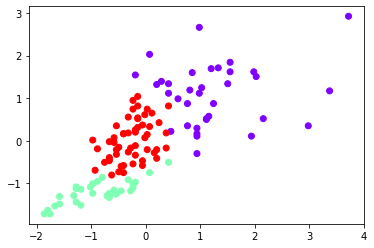

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X['Calories'],X['Sodium(mg)'],c=clusters,cmap='rainbow')

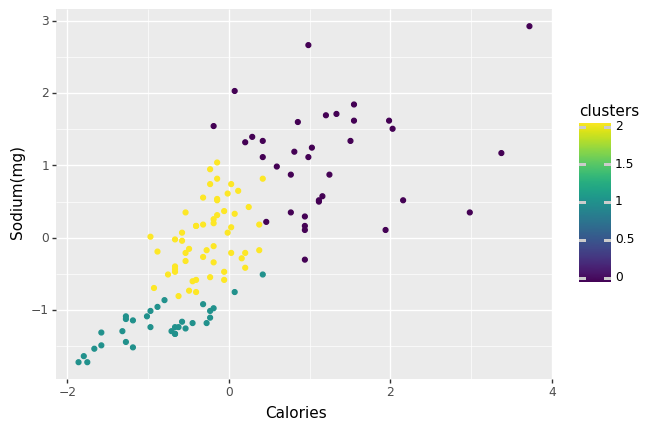

<ggplot: (8757138385745)>

In [22]:
#Above graph in different representation
from plotnine import *
(ggplot(X,aes(x='Calories', y='Sodium(mg)', color="clusters"))+geom_point())

In [23]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [25]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

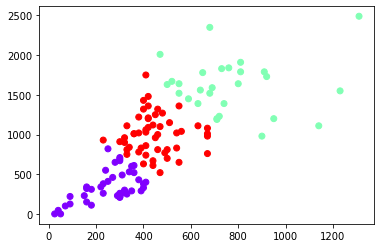

In [27]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Calories'],data_with_clusters['Sodium(mg)'],c=data_with_clusters['Clusters'],cmap='rainbow')

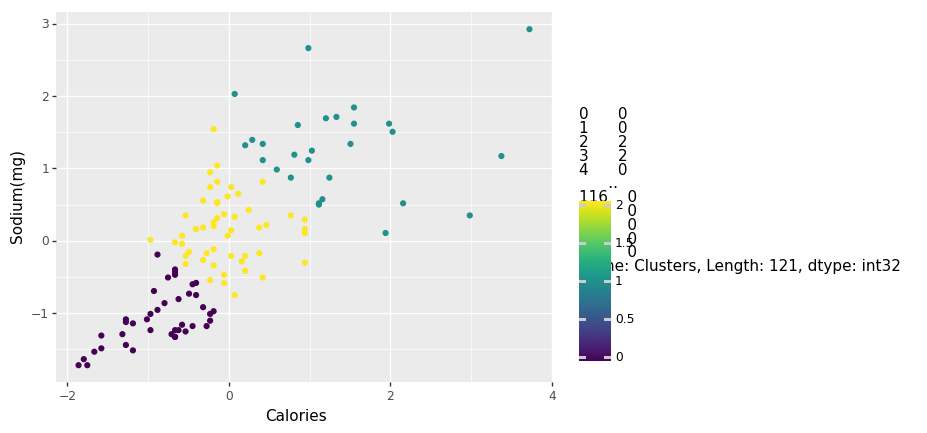

<ggplot: (8757138178269)>

In [30]:
from plotnine import *
(ggplot(X,aes(x='Calories', y='Sodium(mg)', color=data_with_clusters['Clusters']))+geom_point())